# Desafío - Regularización

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Regularización.

## Requerimientos
- En esta ocasión utilizaremos datos de la composición química de muestras de vino.
- Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
- Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    - Identifique el tipo de datos de cada columna.
    - Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    - Encuentre la cantidad de valores faltantes en cada columna.
    - Grafique la distribución empírica de cada atributo

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías básicas.
- Importe los métodos asociados a regularización.
- Importe la base de datos.

In [1]:
# Utiliza esta celda para realizar los import requeridos y lectura del set de datos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

df = pd.read_csv('winequality-red.csv')
display(df.shape)
df.head()

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio
- Identifique el tipo de datos de cada columna.
- Identifique outliers univariados y multivariados.
    - Los primeros los puede encontrar realizando boxplots de cada atributo.
    - Los segundos estudiando los scatterplot entre pares de atributos.

In [2]:
# Utiliza esta celda para identificar el tipo de dato de cada columna
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
# Verificamos si la data cuenta con datos perdidos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Comentarios:** 

**podemos ver que todas nuestras variables son continuas (ya que todas son de typo float) y además no contamos con valores perdidos en la data, lo cual es buenisimo.**

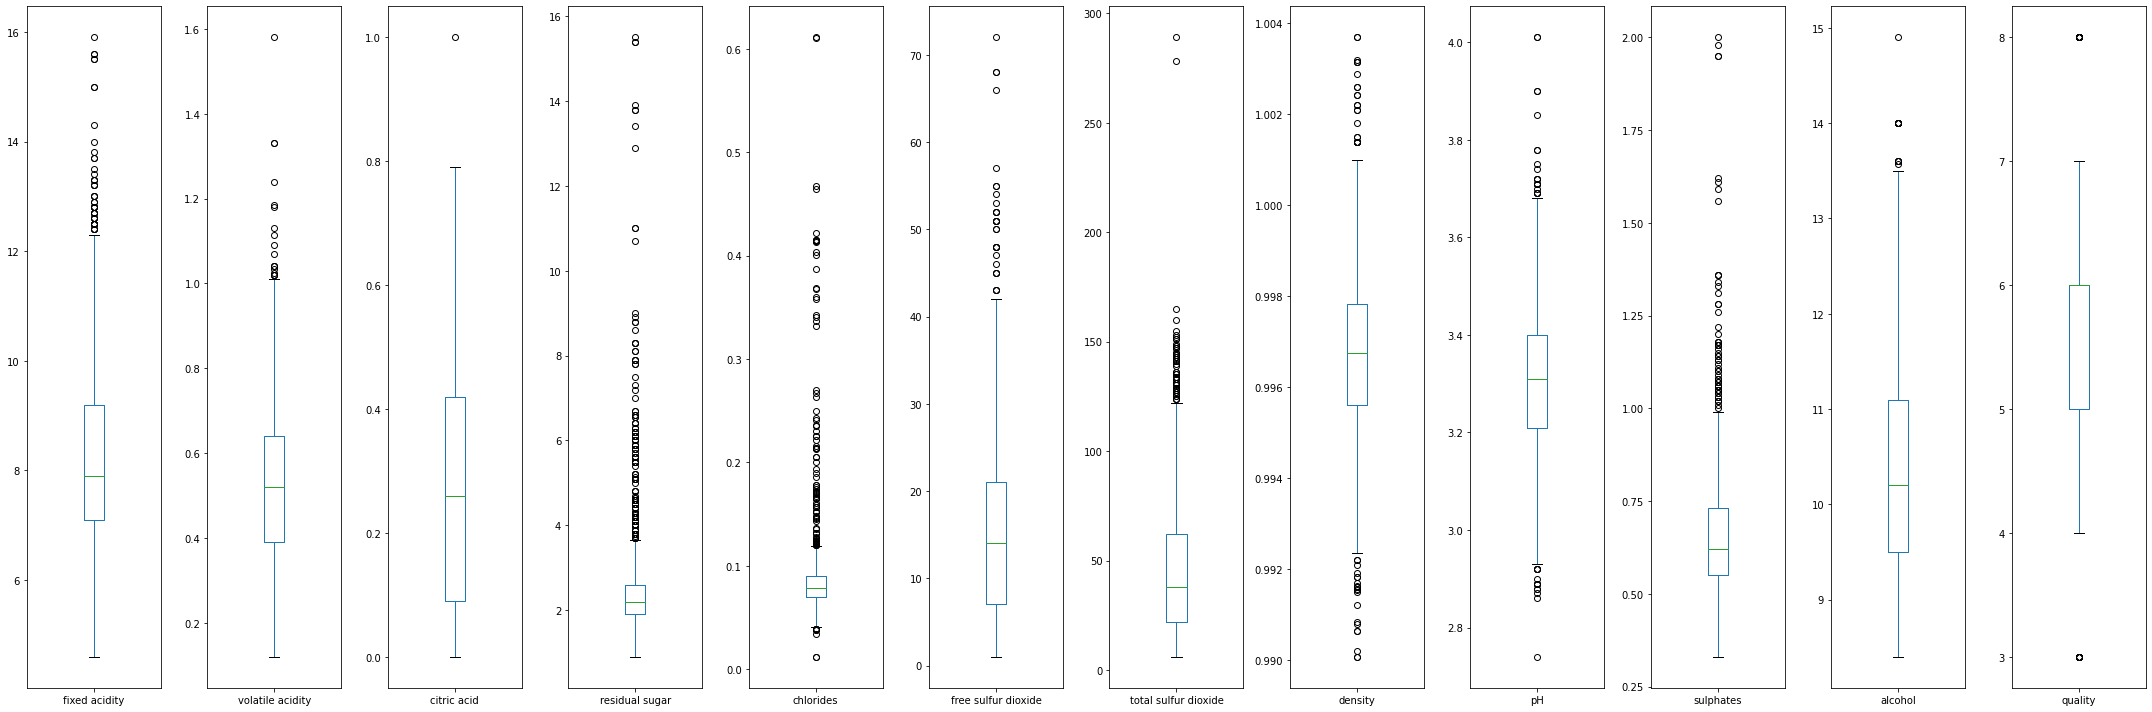

In [4]:
# Utiliza esta celda para graficar boxplots. Tip: Utilizar df.plot(subplots=True, kind="box")

df.plot(subplots=True, kind='box', figsize=(30,10));
plt.tight_layout() # permite no superponer graficos

**Comentarios:** 

**podemos ver que para algunas variables existen muchos valores atipicos (outliers), como las variable `residual sugar`, `chlorides`, `total sulfur dioxide` y `sulphates`. Por otro lado, podemos ver otras variables que presentan pocos outliers, como `citric acid`, `quality`. Por ultimo, no podemos afirmar que variables presentan mas variabilidad ya que no están en la misma escala**

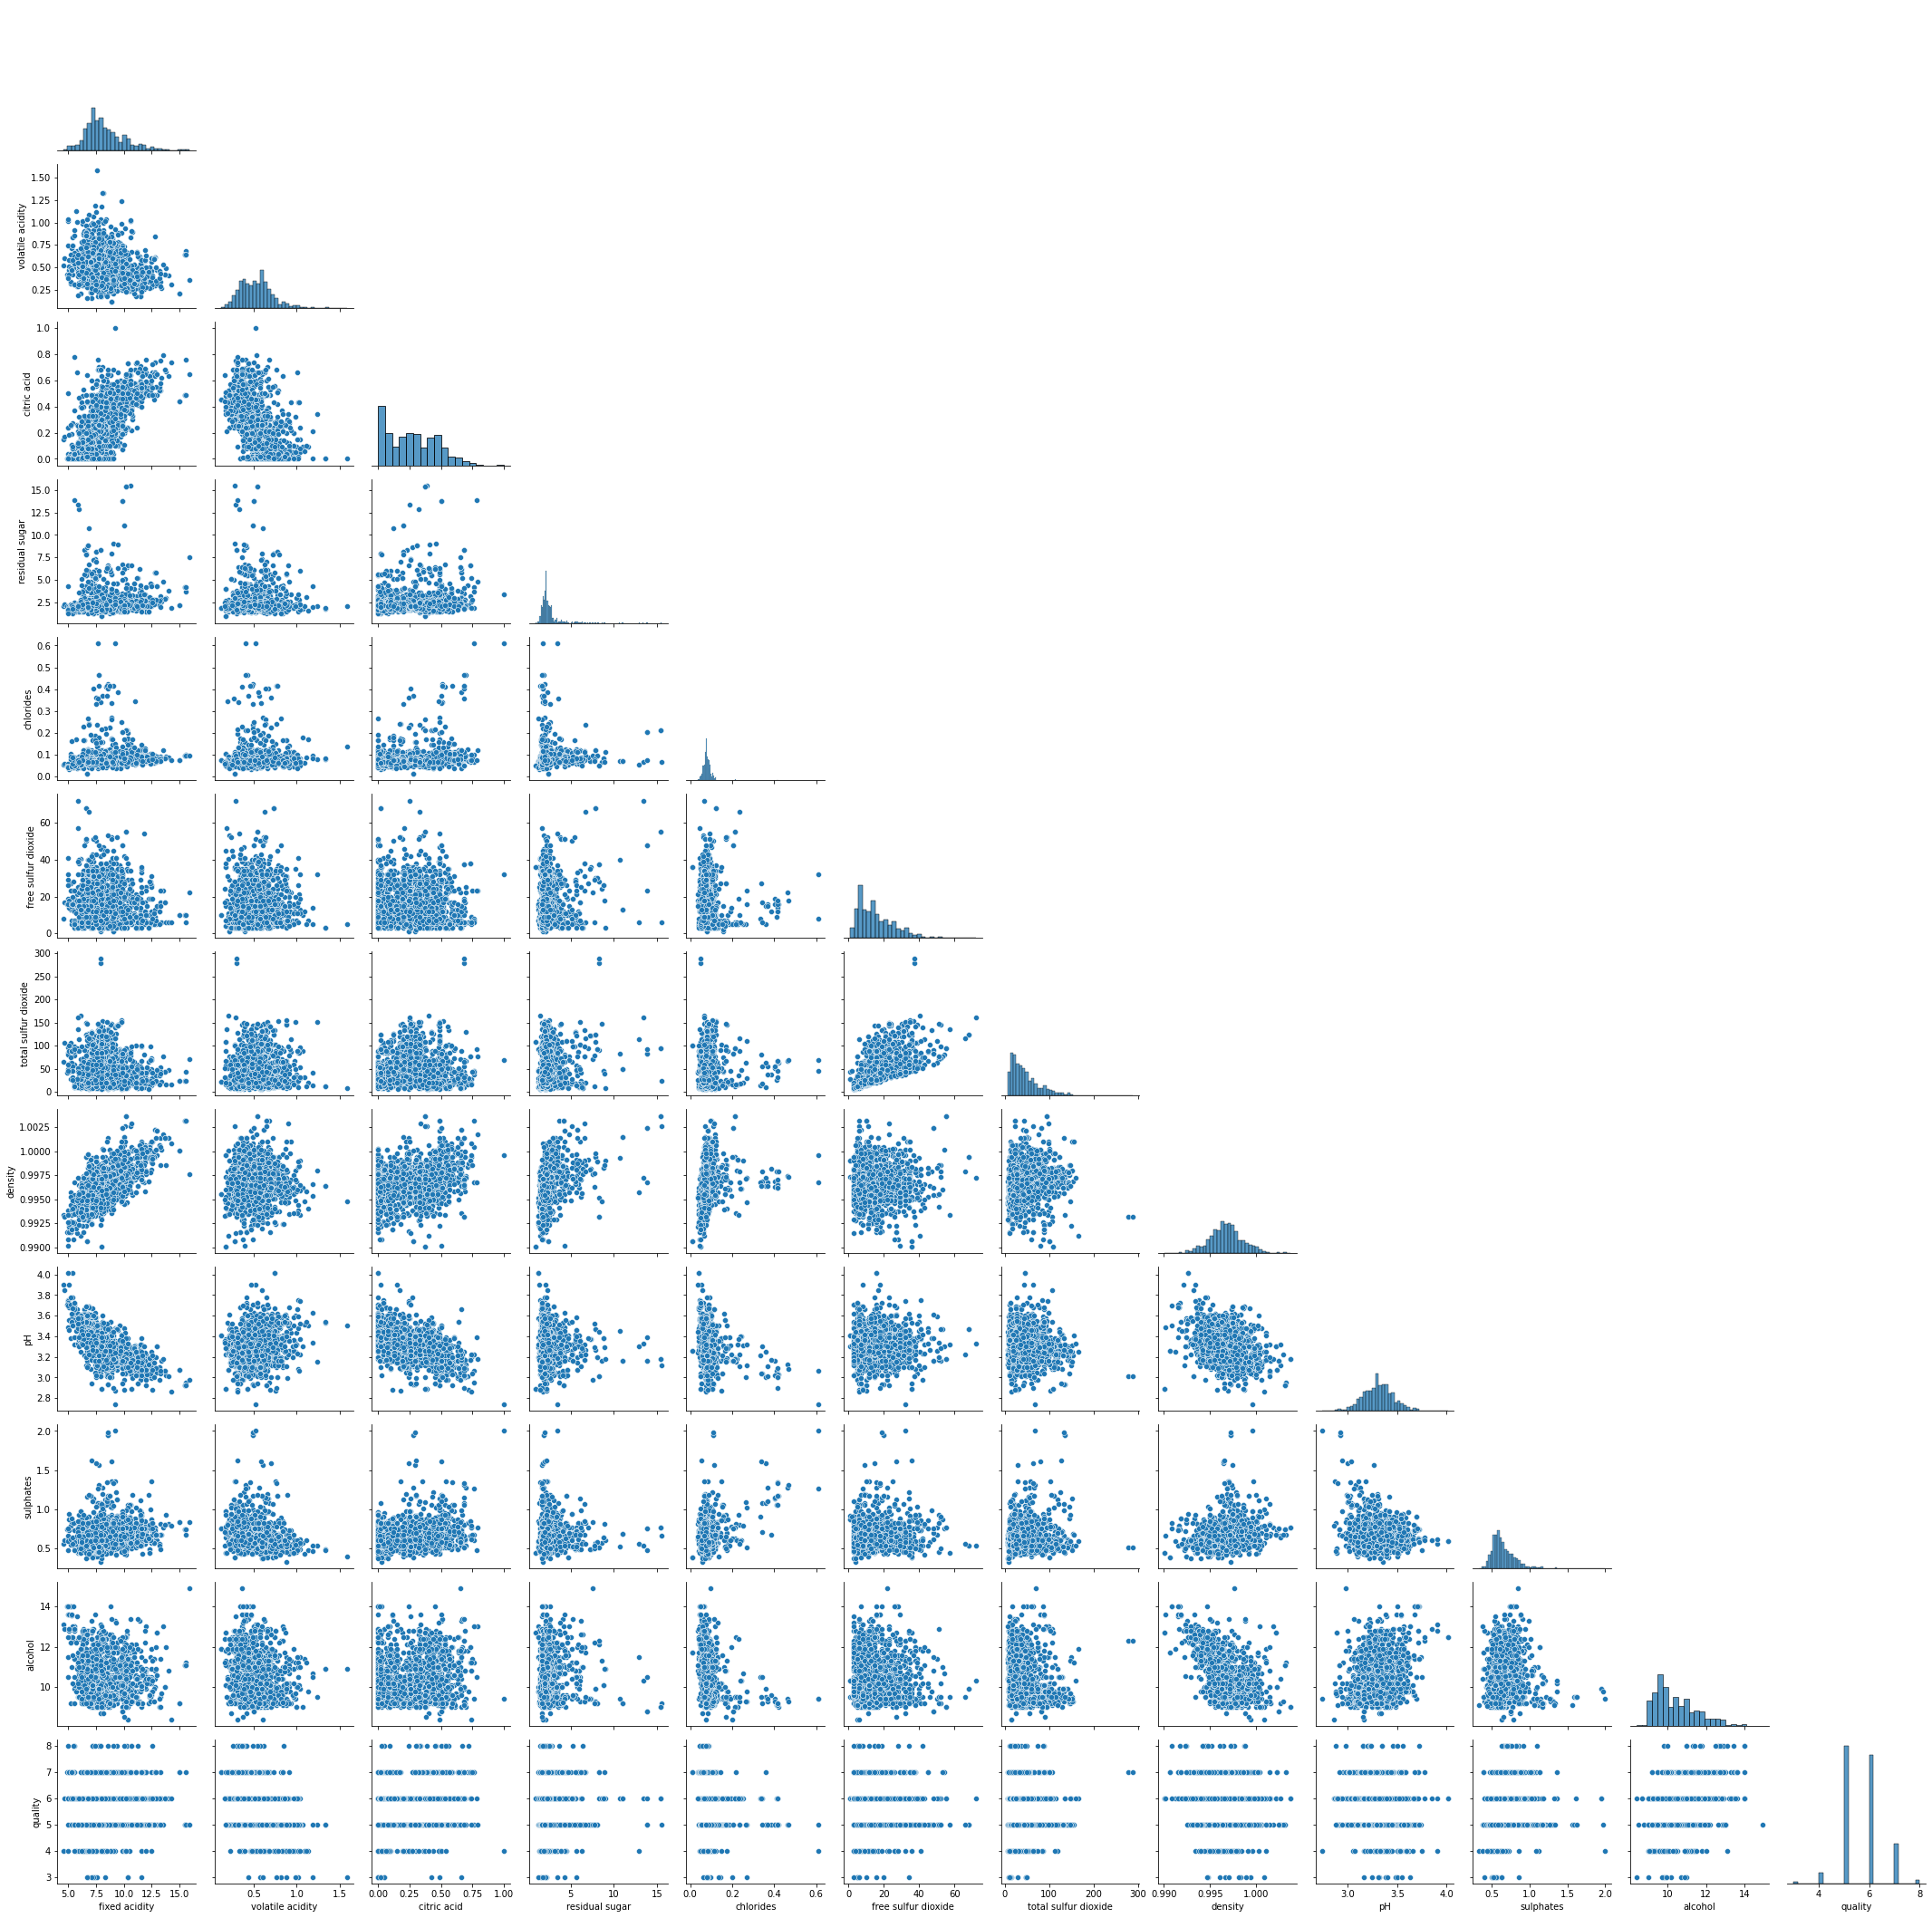

In [5]:
# Utiliza esta celda para graficar scatterplot. Tip: Utilizar pairplot de Seaborn con corner=True. Puedes usar más celdas para graficar subsets

g = sns.PairGrid(df, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot);

**Comentarios:**

**podemos ver que hay ciertas parejas de variables que presentan algún tipo de relacion lineal (correlación) como las que siguen:**
- **`density` y `fixed acidity` posen algun grado de correlacion positiva**
- **`density` y `pH` posen algun grado de correlacion negativa**
- **`total sulfur dioxide` y `free sulfur dioxide` posen algun grado de correlacion positiva**

**para el tema de los outliers multivariados, vemos que la variable `total sulfur dioxide` posee datos atipicos con respecto a todas las variables, la cual es cercano al valor `300` aprox. También se podría considerar el valor `1` de la variable `citric acid` ya que en las demás variables, se puede ver que esta valor tambien está alejado del resto.**


### Ejercicio 3: Regularización de modelos

- Genere tres modelos, correspondientes a `RidgeCV` , `LassoCV` y `ElasticNetCV`. Para cada uno de ellos implemente los siguientes pasos:
    - Entrene los modelos con 10 validaciones cruzadas.
    - Extraiga los coeficientes estimados, el mejor valor `alpha`, MAE (`median_absolute_error`) y RMSE (raiz cuadrada de `mean_squared_error`) asociado a cada modelo.

In [6]:
# Utiliza esta celda para entrenar los 3 modelos solicitados

# Separamos el vector objectivo de las variables prédictoras
df_x = df.drop(columns = 'quality')
df_y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.3, random_state = 42)

# Estandarizamos
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamos los modelos solicitados
ml_ridge = RidgeCV(cv=10).fit(X_train, y_train)  #cv = validaciones cruzadas
ml_lasso = LassoCV(cv=10).fit(X_train, y_train)
ml_enet = ElasticNetCV(cv=10).fit(X_train, y_train)

In [7]:
# Utiliza esta celda para mostrar el mejor alpha y las métricas solicitadas en los 3 modelos

print('-'*40)
print('Métrica RMSE:')
print('-'*40)
print(f'''- Modelo Ridge:      {np.sqrt(mean_squared_error(y_test, ml_ridge.predict(X_test)))}
- Modelo Lasoo:      {np.sqrt(mean_squared_error(y_test, ml_lasso.predict(X_test)))}
- Modelo ElasticNet: {np.sqrt(mean_squared_error(y_test, ml_enet.predict(X_test)))}''')
print('-'*40)
print('Métrica MAE:')
print('-'*40)
print(f'''- Modelo Ridge:      {mean_absolute_error(y_test, ml_ridge.predict(X_test))}
- Modelo Lasoo:      {mean_absolute_error(y_test, ml_lasso.predict(X_test))}
- Modelo ElasticNet: {mean_absolute_error(y_test, ml_enet.predict(X_test))}''')
print('-'*40)

----------------------------------------
Métrica RMSE:
----------------------------------------
- Modelo Ridge:      0.6412038945255524
- Modelo Lasoo:      0.642735592375031
- Modelo ElasticNet: 0.6429238586070142
----------------------------------------
Métrica MAE:
----------------------------------------
- Modelo Ridge:      0.5135846954362681
- Modelo Lasoo:      0.5165767031444306
- Modelo ElasticNet: 0.5170396043335447
----------------------------------------


**¿Qué modelo presenta un mejor desempeño en base a las métricas?**

- **En base al RMSE: el mejor modelo es `Ridge` ya que es el que posee menor RMSE**
- **En base al MAE: el mejor modelo es `Ridge` ya que es el que posee menor RMSE**

**por lo tanto, el mejor modelo es el `Ridge`**

In [8]:
# Utiliza esta celda para mostrar los coeficientes de los 3 modelos. Tip: Llevarlos a un DF y usar escala de color

df_coeficientes = pd.DataFrame({'Ridge': ml_ridge.coef_, 'Lasso': ml_lasso.coef_, 'Enet': ml_enet.coef_}, index = df_x.columns)

df_coeficientes.style.background_gradient(cmap='Reds')

,Ridge,Lasso,Enet
fixed acidity,0.043627,0.000000,0.000000
volatile acidity,-0.197304,-0.188390,-0.186101
citric acid,-0.044273,-0.013055,-0.008980
residual sugar,0.012693,0.000000,0.000000
chlorides,-0.078720,-0.073903,-0.073133
free sulfur dioxide,0.045366,0.029621,0.027489
total sulfur dioxide,-0.106901,-0.093872,-0.091991
density,-0.031971,-0.000000,-0.000000
pH,-0.045248,-0.045366,-0.042012
sulphates,0.139738,0.126868,0.125461


**¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?**

**Respuesta:** **Siguiendo la escala de colores, las variables `volatile acidity`, `chlorides`, `total sulfur dioxide`, `pH`, `sulphates` y `alcohol` mantienen un comportamiento similar a lo largo de cada modelo**